# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset

In [2]:
file_path = r"/kaggle/input/churn-data/Prediction_Data.xlsx"

In [5]:
sheet_name = 'VChurnData'

In [6]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [7]:
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   36440-JHA  Female   78     Yes       Jharkhand                    3   
1   36451-AND  Female   34     Yes  Andhra Pradesh                    2   
2   36469-UTT  Female   36     Yes   Uttar Pradesh                    9   
3   36479-ODI  Female   71     Yes          Odisha                    2   
4   36492-WES  Female   41     Yes     West Bengal                    9   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                26        NaN           Yes             No  ...   
1                30        NaN           Yes            Yes  ...   
2                22        NaN           Yes            Yes  ...   
3                15        NaN           Yes            Yes  ...   
4                15        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      89.550003   3856.750000           0.0   
1  Bank Wi

# Data Preprocessing

In [8]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [10]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable

In [11]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'

In [12]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target

In [13]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Model

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training

In [16]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [17]:
y_pred = rf_model.predict(X_test)

In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[807  58]
 [134 203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       865
           1       0.78      0.60      0.68       337

    accuracy                           0.84      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.84      0.84      0.83      1202



In [19]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

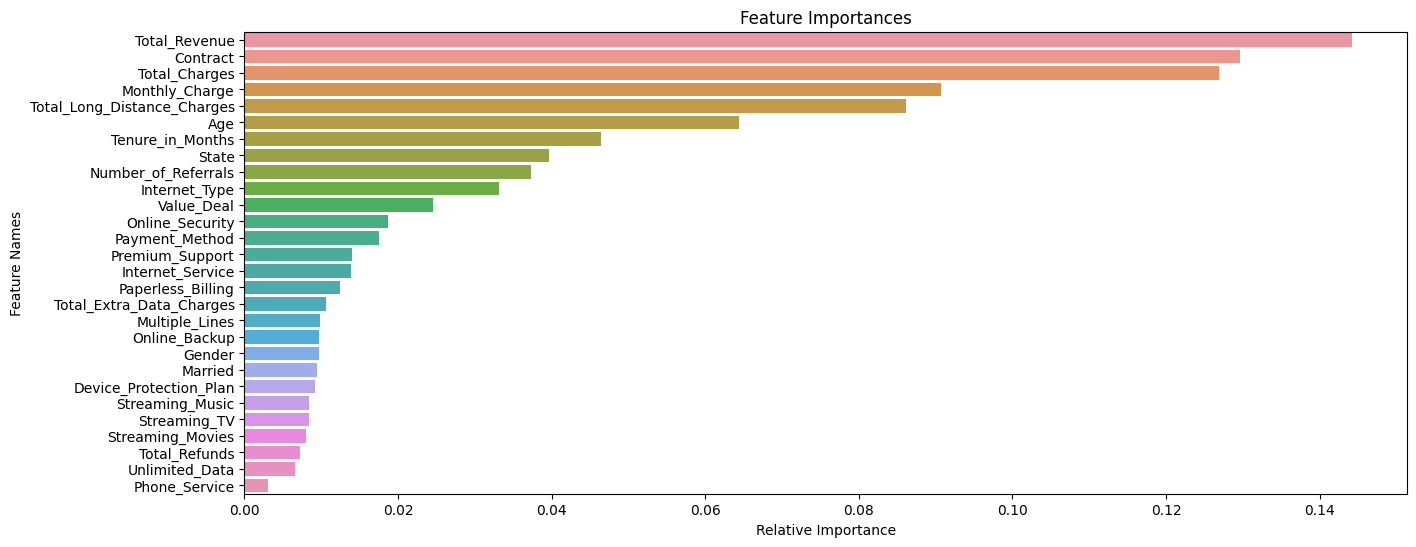

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

# Prediction

In [21]:
file_path = r"/kaggle/input/churn-data/Prediction_Data.xlsx"

In [22]:
sheet_name = 'VJoinData'

In [23]:
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [24]:
print(new_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   36483-KAR    Male   42      No    Karnataka                    2   
1   36628-GUJ  Female   44     Yes      Gujarat                    7   
2   37131-MAH    Male   52      No  Maharashtra                    6   
3   38452-MAH  Female   34      No  Maharashtra                    6   
4   38577-BIH  Female   30     Yes        Bihar                    6   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                14        NaN           Yes             No  ...   
1                 1     Deal 5           Yes             No  ...   
2                 2        NaN           Yes             No  ...   
3                14     Deal 5           Yes             No  ...   
4                36        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      19.750000     19.750000           0.0   
1  Bank Withdrawal      80.1

In [25]:
original_data = new_data.copy()

In [26]:
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame

In [27]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders

In [28]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [29]:
new_predictions = rf_model.predict(new_data)

In [30]:
original_data['Customer_Status_Predicted'] = new_predictions

In [31]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [33]:
original_data.to_csv(r"Predictions.csv", index=False)